In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
data=pd.read_csv('/content/Wine_clust.csv') 

In [3]:
#read data
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
#check the shape of data
data.shape

(178, 13)

In [5]:
#check for null values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
#get data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
#check the columns
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

**KMeans clustering algorithm**

In [8]:
#import library
from sklearn.cluster import KMeans

elbow method

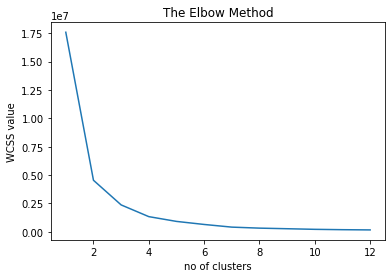

In [9]:
wcss=[]
for i in range(1,13):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('WCSS value')
plt.show()

clusters=2

In [10]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data)

In [11]:
y_kmeans

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

silhouette score

In [12]:
#check silhouette score
from sklearn.metrics import silhouette_score

In [13]:
sil_avg_kmeans=silhouette_score(data,y_kmeans)


In [14]:
print(sil_avg_kmeans)

0.6568536504294317


**Agglomerative Hierarchical Clustering**

In [15]:
# importing the library
import scipy.cluster.hierarchy as sch

Dendrogram

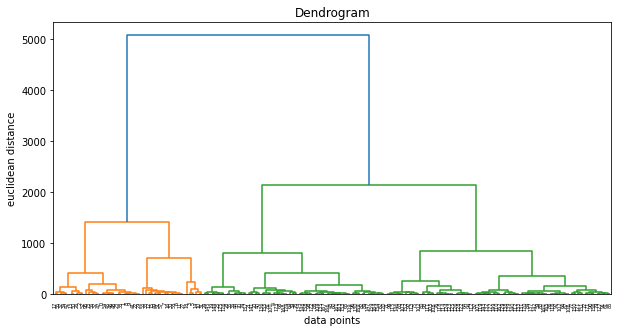

In [16]:
plt.figure(figsize=(10,5))
dendrogram=sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('data points')
plt.ylabel('euclidean distance')
plt.show()

clusters=2

In [17]:
# importing the library
from sklearn.cluster import AgglomerativeClustering

In [18]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data)

In [19]:
#silhouette score
sil_avg_hc=silhouette_score(data,y_hc)

In [20]:
print(sil_avg_hc)

0.6587292996216912


**DBSCAN Algorithm Clustering**

In [21]:
# importing the library
from sklearn.cluster import DBSCAN

In [22]:
# importing the library
from sklearn.neighbors import NearestNeighbors 
# creating an object of the NearestNeighbors class
neighb = NearestNeighbors(n_neighbors=2) 
# fitting the data to the object
nbrs=neighb.fit(data) 
# finding the nearest neighbours
distances,indices=nbrs.kneighbors(data) # finding the nearest neighbours

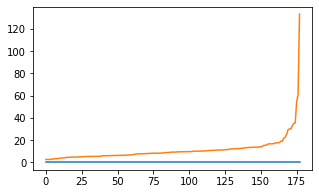

In [23]:
# sorting the distances
distances = np.sort(distances, axis = 0) 
# taking the second column of the sorted distances
distances = distances[:,:] 
# setting the figure size
plt.rcParams['figure.figsize'] = (5,3) 
# plotting the distances
plt.plot(distances) 
plt.show()

From the above plot, we note the maximum curvature of the curve is about 60, and thus we picked our Eps as 60

The min sample per cluster as 2* dimension=2* 13=26

In [24]:
dbscan=DBSCAN(eps=60,min_samples=26)

In [25]:
# fitting the model
y_db=dbscan.fit_predict(data)

In [26]:
np.unique(y_db)

array([-1,  0])

In [27]:
#silhouette score
sil_avg_db=silhouette_score(data,y_db)

In [28]:
sil_avg_db

0.5751172188022147

standard scaling

In [29]:
#import library
from sklearn.preprocessing import StandardScaler

In [30]:
# fitting the model
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [31]:
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)

In [32]:
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


**Principal component analysis (PCA)**

In [33]:
#import library
from sklearn.decomposition import PCA

In [34]:
pca=PCA(n_components=0.97)
pca.fit(scaled_data)

PCA(n_components=0.97)

In [35]:
x_pca=pca.transform(scaled_data)
x_pca.shape

(178, 11)

In [36]:
pca1=PCA(n_components=10)
pca1.fit(scaled_data)
x_pca1=pca1.transform(scaled_data)
x_pca1.shape

(178, 10)

silhouette score after PCA

In [37]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x_pca)

In [38]:
#silhouette score after PCA
sil_avg_kmeans=silhouette_score(x_pca,y_kmeans)

In [39]:
sil_avg_kmeans

0.27371776816110915

In [40]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x_pca)

In [41]:
#silhouette score after PCA
sil_avg_hc=silhouette_score(x_pca,y_hc)

In [42]:
sil_avg_hc

0.27087543385674673

In [43]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x_pca1)

In [44]:
sil_avg_kmeans=silhouette_score(x_pca1,y_kmeans)

In [45]:
sil_avg_kmeans

0.29867482943692875

In [46]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x_pca1)

In [47]:
sil_avg_hc=silhouette_score(x_pca1,y_hc)

In [48]:
sil_avg_hc

0.2720325942157364

**before pca kmeans clustering silhouette score=0.6568536504294317 and after pca=0.29867482943692875**

**before pca Agglomerative Clustering silhouette score=0.6587292996216912 and after pca=0.2720325942157364** 

**before pca DBSCAN Algorithm Clustering silhouette score=0.5751172188022147** 